In [8]:
import pandas as pd

from settings import key
from datetime import datetime


In [9]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [10]:
df = pd.DataFrame(coords)


In [11]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
19948,56.9549560546875,24.18711280822754,2024-11-12 16:32:05
19949,56.9735406,24.1327404,2024-11-12 16:38:28
19950,57.15315246582031,24.848072052001953,2024-11-12 16:39:21
19951,56.973,24.1327,2024-11-12 16:41:08


In [12]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [13]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [14]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
19948,56.9549560546875,24.18711280822754,2024-11-12 16:32:05,2024-11-12 16
19949,56.9735406,24.1327404,2024-11-12 16:38:28,2024-11-12 16
19950,57.15315246582031,24.848072052001953,2024-11-12 16:39:21,2024-11-12 16
19951,56.973,24.1327,2024-11-12 16:41:08,2024-11-12 16


In [15]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

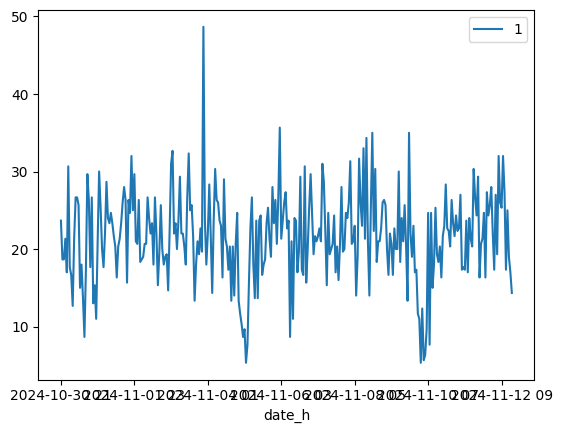

In [16]:
df_h.plot()

In [17]:
from sklearn import linear_model


In [18]:
reg = linear_model.LinearRegression()


In [19]:
import numpy as np


In [20]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [21]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [22]:
import matplotlib.pyplot as plt


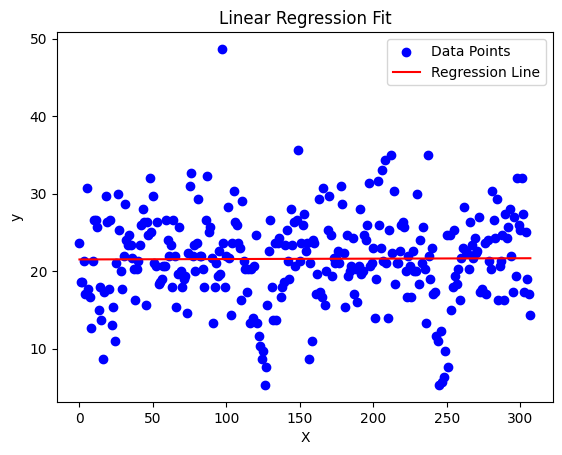

In [23]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [24]:
y_pred

array([[21.51561384],
       [21.51612551],
       [21.51663718],
       [21.51714886],
       [21.51766053],
       [21.51817221],
       [21.51868388],
       [21.51919556],
       [21.51970723],
       [21.5202189 ],
       [21.52073058],
       [21.52124225],
       [21.52175393],
       [21.5222656 ],
       [21.52277728],
       [21.52328895],
       [21.52380063],
       [21.5243123 ],
       [21.52482397],
       [21.52533565],
       [21.52584732],
       [21.526359  ],
       [21.52687067],
       [21.52738235],
       [21.52789402],
       [21.52840569],
       [21.52891737],
       [21.52942904],
       [21.52994072],
       [21.53045239],
       [21.53096407],
       [21.53147574],
       [21.53198741],
       [21.53249909],
       [21.53301076],
       [21.53352244],
       [21.53403411],
       [21.53454579],
       [21.53505746],
       [21.53556913],
       [21.53608081],
       [21.53659248],
       [21.53710416],
       [21.53761583],
       [21.53812751],
       [21